### In this assignment students need to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost. 
The description of the dataset is as follows: 
    
Data Set Information:
Extraction was done by Barry Becker from the 1994 Census
database. A set of reasonably clean records was extracted using the
following conditions: ((AAGE>16) && (AGI>100) &&
(AFNLWGT>1)&& (HRSWK>0))

Attribute Information:
- Listing of attributes: >50K, <=50K.
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married,
- Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Execmanagerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
#Import the necessary libraries and the data

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz


train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

c:\users\leo26\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [3]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
train_set.shape, test_set.shape

((32561, 15), (16281, 15))

In [6]:
train_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
test_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [8]:
#Check for missing values

print(train_set.isnull().sum())
print(test_set.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64


In [9]:
train_set.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       42
wage_class            2
dtype: int64

In [10]:
test_set.nunique()

age                  73
workclass             9
fnlwgt            12787
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        113
capital_loss         82
hours_per_week       89
native_country       41
wage_class            2
dtype: int64

In [11]:
for feature in train_set.columns:    
    if train_set[feature].dtype == 'object':
        
        print('_'*10,feature, end=" ",)
        print('_'*10)
        print(train_set[feature].value_counts())

__________ workclass __________
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
__________ education __________
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
__________ marital_status __________
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name

#### Data Visualization

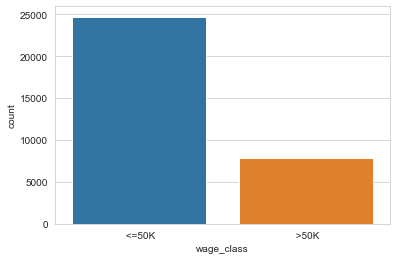

In [12]:
#Let's visualize the data for both train set and test set

sns.set_style("whitegrid")
sns.countplot(x='wage_class', data = train_set)

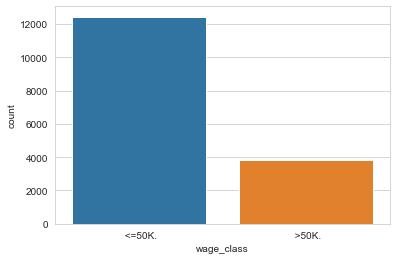

In [13]:
sns.set_style("whitegrid")
sns.countplot(x='wage_class', data = test_set)

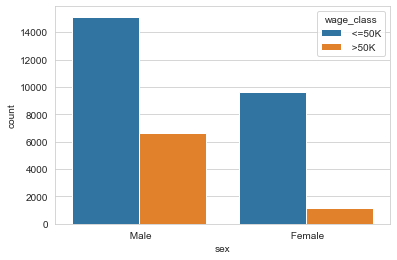

In [14]:
sns.set_style("whitegrid")
sns.countplot(hue='wage_class', x='sex', data = train_set)

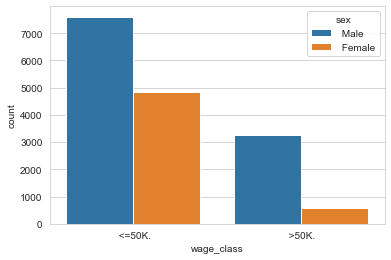

In [15]:
sns.set_style("whitegrid")
sns.countplot(x='wage_class', hue='sex', data = test_set)

[Text(0, 0, ' State-gov'),
 Text(0, 0, ' Self-emp-not-inc'),
 Text(0, 0, ' Private'),
 Text(0, 0, ' Federal-gov'),
 Text(0, 0, ' Local-gov'),
 Text(0, 0, ' ?'),
 Text(0, 0, ' Self-emp-inc'),
 Text(0, 0, ' Without-pay'),
 Text(0, 0, ' Never-worked')]

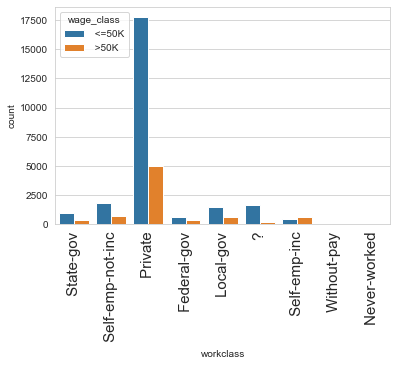

In [16]:
g = sns.countplot(hue='wage_class', x='workclass', data = train_set)
g.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize = 15)

[Text(0, 0, ' Bachelors'),
 Text(0, 0, ' HS-grad'),
 Text(0, 0, ' 11th'),
 Text(0, 0, ' Masters'),
 Text(0, 0, ' 9th'),
 Text(0, 0, ' Some-college'),
 Text(0, 0, ' Assoc-acdm'),
 Text(0, 0, ' Assoc-voc'),
 Text(0, 0, ' 7th-8th'),
 Text(0, 0, ' Doctorate'),
 Text(0, 0, ' Prof-school'),
 Text(0, 0, ' 5th-6th'),
 Text(0, 0, ' 10th'),
 Text(0, 0, ' 1st-4th'),
 Text(0, 0, ' Preschool'),
 Text(0, 0, ' 12th')]

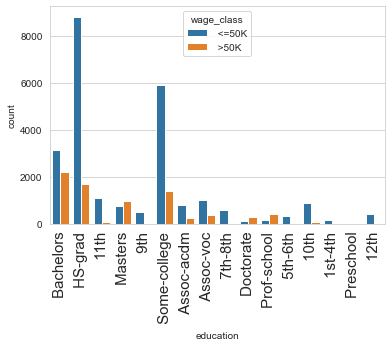

In [17]:
h = sns.countplot(hue='wage_class', x='education', data = train_set)
h.set_xticklabels(h.get_xticklabels(), rotation=90, fontsize = 15)

##### Features Native_counrty, Occupation, workclass are having one value as '?' and that needs to be handled. We can get the index of the ? in the above mentioned columns. 

In [18]:
import re
#train_set.columns
train_set.rename(columns=lambda name: re.sub(r"\-",'_',name), inplace=True)

In [19]:
filter1 = train_set["workclass"]=="?"
#index= train_set.where(filter1).index
index = train_set[train_set["native_country"]== ' ?'].index
#index.value_counts()  # to display all the indexes having value '?'
index.value_counts().sum()  # sum of those indexes 
# type(index)

583

In [20]:
#now apply the filter for the '?' value in those above 3 columns

indexes_list = [] # will contain three index series of desired syntexes
def filter_questionMark(l):
    
    for item in l:
        print('_'*10,item, '_'*10)
        index = train_set[train_set[item]== ' ?'].index
        indexes_list.append(index)
        #index.value_counts()  # to display all the indexes having value '?'
        print("Total `?` in {0}: {1}".format(item, index.value_counts().sum()))  # sum of those indexes 
        print("Total % of `?` in {0}: {1}".format(item, round((index.value_counts().sum()/train_set.shape[0])*100,2)))
        
filter2= ['workclass','occupation', 'native_country']
filter_questionMark(filter2)

__________ workclass __________
Total `?` in workclass: 1836
Total % of `?` in workclass: 5.64
__________ occupation __________
Total `?` in occupation: 1843
Total % of `?` in occupation: 5.66
__________ native_country __________
Total `?` in native_country: 583
Total % of `?` in native_country: 1.79


In [21]:
print("Original Shape of Train Set:", train_set.shape)
print("Rows in Train Set:", train_set.shape[0])

Original Shape of Train Set: (32561, 15)
Rows in Train Set: 32561


In [22]:
print('\n Droping `?` indexes from `workclass` featutre....')
train_set= train_set.drop(index)
print("Total New rows:",train_set.shape[0])


 Droping `?` indexes from `workclass` featutre....
Total New rows: 31978


In [23]:
print('\n Droping `?` indexes from `native_country` featutre....')
index1= train_set[train_set["native_country"]== ' ?'].index
train_set = train_set.drop(index1)
print("Total New rows:",train_set.shape[0])


 Droping `?` indexes from `native_country` featutre....
Total New rows: 31978


In [24]:
print('\n Droping `?` indexes from `occupation` featutre....')
index2 = train_set[train_set["occupation"]== ' ?'].index
train_set = train_set.drop(index2)
print("Total New rows:",train_set.shape[0])


 Droping `?` indexes from `occupation` featutre....
Total New rows: 30162


In [25]:
# check for '?' again
filter_questionMark(filter2)

__________ workclass __________
Total `?` in workclass: 0
Total % of `?` in workclass: 0.0
__________ occupation __________
Total `?` in occupation: 0
Total % of `?` in occupation: 0.0
__________ native_country __________
Total `?` in native_country: 0
Total % of `?` in native_country: 0.0


In [26]:
# let's plot histogram for every column
#plt.figure(figsize=(20,25), facecolor='white')
#plotnumber = 1

#for column in train_set:
 #   if plotnumber<=9 :     # as there are 9 columns in the data
  #      ax = plt.subplot(3,3,plotnumber)
   #     sns.countplot(train_set[column])
    #    plt.xlabel(column,fontsize=20)
     #   plt.ylabel('wage_class',fontsize=20)
    #plotnumber+=1
#plt.show()

In [27]:
# let's plot histogram for every column
#plt.figure(figsize=(20,25), facecolor='white')
#plotnumber = 1

#for column in test_set:
 #   if plotnumber<=9 :     # as there are 9 columns in the data
  #      ax = plt.subplot(3,3,plotnumber)
   #     sns.countplot(train_set[column])
    #    plt.xlabel(column,fontsize=20)
     #   plt.ylabel('wage_class',fontsize=20)
    #plotnumber+=1
#plt.show()

#### Convert all the categorical values to numerical values using one-hot encoding


In [28]:
df1 = train_set.copy()

objectFeature = []
for i in list(df1.columns):
    if (df1[i].dtypes == 'object'):
        objectFeature.append(i)
        

df1=pd.get_dummies(df1[objectFeature[:-1]])

In [29]:
intFeature = []
for i in list(train_set.columns):
    if (train_set[i].dtypes == 'int64'):
        intFeature.append(i)

df2 = train_set[intFeature]

In [30]:
print(df1.shape)
print(df2.shape)

(30162, 98)
(30162, 6)


In [31]:
X_train = pd.concat([df1, df2], axis=1)

In [32]:
X_train.shape   # final dataframe to be get Trained

(30162, 104)

#### Using LabelEncoder for the target variable

In [33]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=train_set[objectFeature[-1]]
le.fit(y)
le.classes_   # will display only two classes---> array([' <=50K', ' >50K'], dtype=object)y_train
y_train=le.fit_transform(y)

In [34]:
y=train_set[objectFeature[-1]]

In [50]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

#### Now repeat the same for test data



In [36]:
df3 = test_set.copy()

objectFeature = []
for i in list(df3.columns):
    if (df3[i].dtypes == 'object'):
        objectFeature.append(i)
        

df3=pd.get_dummies(df3[objectFeature[:-1]])

In [37]:
intFeature = []
for i in list(test_set.columns):
    if (test_set[i].dtypes == 'int64'):
        intFeature.append(i)

df4 = test_set[intFeature]

In [38]:
print(df3.shape)
print(df4.shape)

(16281, 101)
(16281, 6)


In [51]:
df3.head()

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
X_test = pd.concat([df3, df4], axis=1)
X_test.shape   # final dataframe to be tested

(16281, 107)

In [40]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1=test_set[objectFeature[-1]]
le.fit(y1)
le.classes_   # will display only two classes---> array([' <=50K', ' >50K'], dtype=object)y_train
y_test=le.fit_transform(y1)

In [41]:
y_test.shape

(16281,)

In [54]:
y_test

array([0, 0, 1, ..., 0, 0, 1])

### Using the XGBOOST to build the model

In [59]:
X_train, X_test, y_train, y_test =train_test_split(X_train, y_train, test_size=.25)

In [60]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((22621, 104), (7541, 104), (22621,), (7541,))

In [44]:
!pip install xgboost

In [61]:
import sklearn
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [62]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': .5,
    'silent': True,    # would be boolean in sklearn
    'n_estimators': 100
}

In [63]:
xgb = XGBClassifier(**params).fit(X_train,y_train)
y_pred= xgb.predict(X_test)

[23:47:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [64]:
preds_proba = xgb.predict_proba(X_test)
preds_proba

array([[9.8930204e-01, 1.0697980e-02],
       [9.5542806e-01, 4.4571925e-02],
       [9.9992478e-01, 7.5192693e-05],
       ...,
       [9.9633181e-01, 3.6681690e-03],
       [9.8851633e-01, 1.1483684e-02],
       [8.3286428e-01, 1.6713575e-01]], dtype=float32)

In [65]:
#Measure the accuracy of the model
from sklearn.metrics import accuracy_score

correct = 0
for i in range(len(y_pred)):
    if (y_test[i] == y_pred[i]):
        correct += 1
        
accuracy = accuracy_score(y_test, y_pred)
print('Predicted correctly: {0}/{1}'.format(correct, len(y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy))
print("Error: {0:0.4f}". format(1-accuracy))

Predicted correctly: 6510/7541
Accuracy score: 0.8633
Error: 0.1367


In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      5655
           1       0.78      0.63      0.70      1886

    accuracy                           0.86      7541
   macro avg       0.83      0.79      0.81      7541
weighted avg       0.86      0.86      0.86      7541



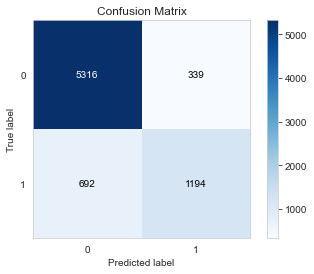

In [70]:
!pip install scikit-plot

import scikitplot
scikitplot.metrics.plot_confusion_matrix(y_test, y_pred)


In [71]:
eval_set = [(X_train,y_train), (X_test, y_test)]
xgb1 = XGBClassifier(**params).fit(X_train,y_train,
                                   early_stopping_rounds=15, 
                                   eval_metric=["error", "logloss"], 
                                   eval_set=eval_set,
                                   verbose=True)

[23:52:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.17462	validation_0-logloss:0.50603	validation_1-error:0.17929	validation_1-logloss:0.50876
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 15 rounds.
[1]	validation_0-error:0.15835	validation_0-logloss:0.43438	validation_1-error:0.16390	validation_1-logloss:0.43795
[2]	validation_0-error:0.15773	validation_0-logloss:0.40005	validation_1-error:0.16311	validation_1-logloss:0.40577
[3]	validation_0-error:0.15247	validation_0-logloss:0.37675	validation_1-error:0.15608	validation_1-log

[66]	validation_0-error:0.13015	validation_0-logloss:0.28301	validation_1-error:0.13791	validation_1-logloss:0.29603
[67]	validation_0-error:0.13023	validation_0-logloss:0.28278	validation_1-error:0.13778	validation_1-logloss:0.29613
[68]	validation_0-error:0.13001	validation_0-logloss:0.28258	validation_1-error:0.13805	validation_1-logloss:0.29613
[69]	validation_0-error:0.12979	validation_0-logloss:0.28236	validation_1-error:0.13751	validation_1-logloss:0.29644
[70]	validation_0-error:0.12948	validation_0-logloss:0.28223	validation_1-error:0.13685	validation_1-logloss:0.29636
[71]	validation_0-error:0.12908	validation_0-logloss:0.28209	validation_1-error:0.13672	validation_1-logloss:0.29636
[72]	validation_0-error:0.12904	validation_0-logloss:0.28203	validation_1-error:0.13672	validation_1-logloss:0.29623
[73]	validation_0-error:0.12899	validation_0-logloss:0.28196	validation_1-error:0.13725	validation_1-logloss:0.29614
[74]	validation_0-error:0.12891	validation_0-logloss:0.28189	val

In [73]:
y_pred1=xgb1.predict(X_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [75]:
#Measure the accuracy of the model
from sklearn.metrics import accuracy_score

correct = 0
for i in range(len(y_pred1)):
    if (y_test[i] == y_pred1[i]):
        correct += 1
        
accuracy = accuracy_score(y_test, y_pred1)
print('Predicted correctly: {0}/{1}'.format(correct, len(y_pred1)))
print('Accuracy score: {:.4f}'.format(accuracy))
print("Error: {0:0.4f}". format(1-accuracy))

Predicted correctly: 6510/7541
Accuracy score: 0.8633
Error: 0.1367


In [76]:
accuracy_score(y_test, y_pred1)

0.8632807319984087

#### Plotting Classifying errors and log loss with respect to each iteration¶

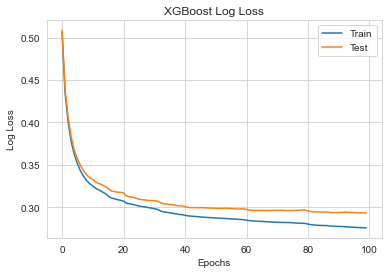

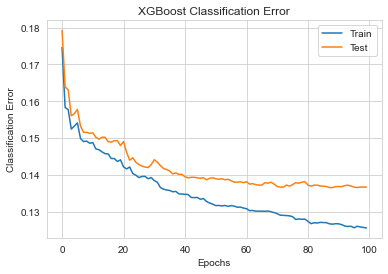

In [77]:
# retrieve performance metrics
results = xgb1.evals_result()
epochs = len(results['validation_0']['error'])
x = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x, results['validation_0']['logloss'], label='Train')
ax.plot(x, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.xlabel('Epochs')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x, results['validation_0']['error'], label='Train')
ax.plot(x, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.xlabel('Epochs')
plt.title('XGBoost Classification Error')
plt.show()

In [78]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 20,
    'learning_rate': .01,
    'silent': True,    # would be boolean in sklearn
    'n_estimators': 200
}

In [80]:
eval_set = [(X_train,y_train), (X_test, y_test)]
xgb1 = XGBClassifier(**params).fit(X_train,y_train,
                                   early_stopping_rounds=15, 
                                   eval_metric=["error", "logloss"], 
                                   eval_set=eval_set,
                                   verbose=True)

[23:55:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.09580	validation_0-logloss:0.68635	validation_1-error:0.16364	validation_1-logloss:0.68715
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 15 rounds.
[1]	validation_0-error:0.09491	validation_0-logloss:0.67974	validation_1-error:0.16298	validation_1-logloss:0.68128
[2]	validation_0-error:0.09610	validation_0-logloss:0.67324	validation_1-error:0.16245	validation_1-logloss:0.67554
[3]	validation_0-error:0.09460	validation_0-logloss:0.66683	validation_1-error:0.15966	validation_1-log

[66]	validation_0-error:0.07873	validation_0-logloss:0.41297	validation_1-error:0.15117	validation_1-logloss:0.45718
[67]	validation_0-error:0.07833	validation_0-logloss:0.41044	validation_1-error:0.15131	validation_1-logloss:0.45524
[68]	validation_0-error:0.07816	validation_0-logloss:0.40791	validation_1-error:0.15131	validation_1-logloss:0.45331
[69]	validation_0-error:0.07798	validation_0-logloss:0.40542	validation_1-error:0.15131	validation_1-logloss:0.45143
[70]	validation_0-error:0.07816	validation_0-logloss:0.40298	validation_1-error:0.15064	validation_1-logloss:0.44955
[71]	validation_0-error:0.07772	validation_0-logloss:0.40054	validation_1-error:0.15078	validation_1-logloss:0.44773
[72]	validation_0-error:0.07714	validation_0-logloss:0.39815	validation_1-error:0.15011	validation_1-logloss:0.44592
[73]	validation_0-error:0.07696	validation_0-logloss:0.39581	validation_1-error:0.14985	validation_1-logloss:0.44417
[74]	validation_0-error:0.07696	validation_0-logloss:0.39344	val

[136]	validation_0-error:0.06940	validation_0-logloss:0.28922	validation_1-error:0.14600	validation_1-logloss:0.36814
[137]	validation_0-error:0.06940	validation_0-logloss:0.28805	validation_1-error:0.14600	validation_1-logloss:0.36737
[138]	validation_0-error:0.06918	validation_0-logloss:0.28685	validation_1-error:0.14640	validation_1-logloss:0.36660
[139]	validation_0-error:0.06923	validation_0-logloss:0.28568	validation_1-error:0.14640	validation_1-logloss:0.36585
[140]	validation_0-error:0.06901	validation_0-logloss:0.28447	validation_1-error:0.14653	validation_1-logloss:0.36511
[141]	validation_0-error:0.06887	validation_0-logloss:0.28329	validation_1-error:0.14653	validation_1-logloss:0.36436
[142]	validation_0-error:0.06879	validation_0-logloss:0.28215	validation_1-error:0.14680	validation_1-logloss:0.36363
[143]	validation_0-error:0.06861	validation_0-logloss:0.28104	validation_1-error:0.14693	validation_1-logloss:0.36292
[144]	validation_0-error:0.06848	validation_0-logloss:0.

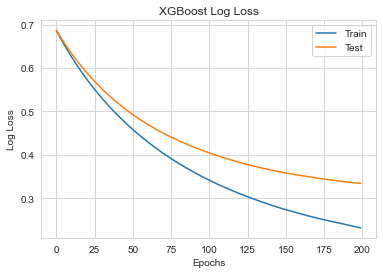

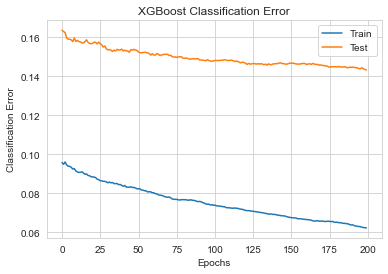

In [81]:
# retrieve performance metrics
results = xgb1.evals_result()
epochs = len(results['validation_0']['error'])
x = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x, results['validation_0']['logloss'], label='Train')
ax.plot(x, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.xlabel('Epochs')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x, results['validation_0']['error'], label='Train')
ax.plot(x, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.xlabel('Epochs')
plt.title('XGBoost Classification Error')
plt.show()

In [82]:
#Import Xgboost
import xgboost as xgb

In [83]:
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test, label = y_test)

In [84]:
#creating watchlist of training
# to see out output 
watchlist = [(dtrain,'train'),(dtest, 'eval')]

In [85]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 1.0,
    'silent': True,    # would be boolean in sklearn
    'booster' : 'gbtree',
    'max_depth' : 7,
    'eval_metric' : 'auc'
}
# using bydeafault eta [default=0.3, alias: learning_rate]

num_rounds = 100

In [87]:
model_xgb = xgb.train(params, dtrain, num_rounds, evals = watchlist, early_stopping_rounds = 15, verbose_eval = True)

[23:57:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.90605	eval-auc:0.89480
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 15 rounds.
[1]	train-auc:0.91939	eval-auc:0.90717
[2]	train-auc:0.92524	eval-auc:0.90985
[3]	train-auc:0.92814	eval-auc:0.90956
[4]	train-auc:0.93080	eval-auc:0.91025
[5]	train-auc:0.93723	eval-auc:0.91824
[6]	train-auc:0.94022	eval-auc:0.91701
[7]	train-auc:0.94334	eval-auc:0.91579
[8]	train-auc:0.94466	eval-auc:0.91668
[9]	train-auc:0.94573	eval-auc:0.91631
[10]	train-auc:0.94826	eval-auc:0.91679
[11]	train-auc:0.95021	eval-auc:0.91647
[12]	

In [88]:
features_contribution = pd.Series(model_xgb.get_fscore()).sort_values(ascending=False)

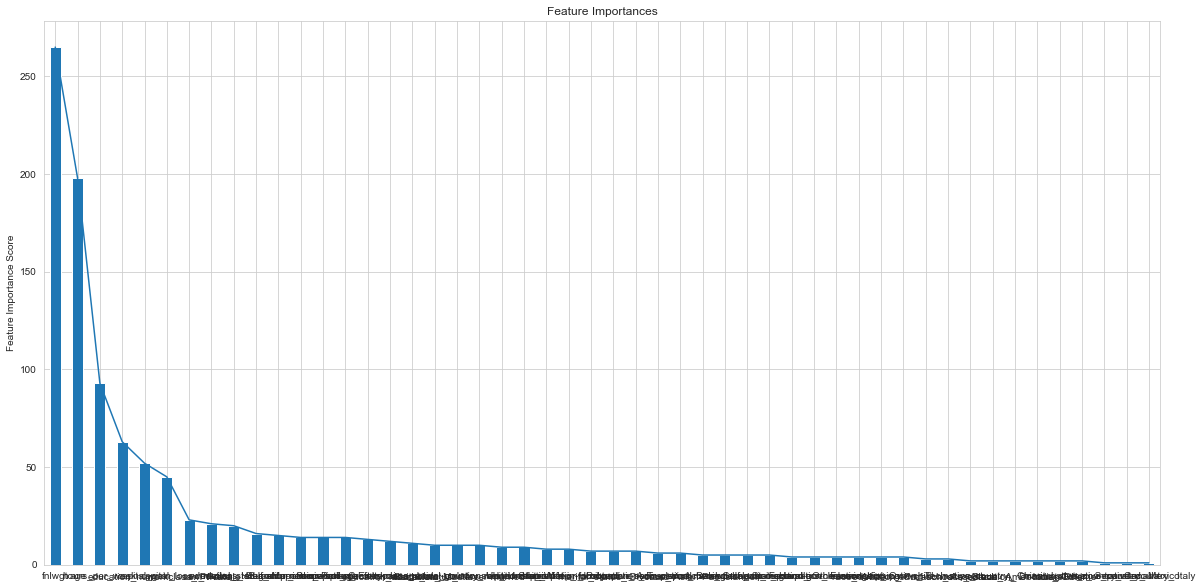

In [90]:
plt.figure(figsize=(20,10))
features_contribution[:50].plot(kind='bar', title='Feature Importances')
features_contribution[:50].plot(kind='line')
plt.ylabel('Feature Importance Score')
plt.show()

#### Hyperparameter Optimisation 

In [91]:
params = {
    "learning_rate"    : [0.5, 0.10, 0.15, 0.20, 0.25, 0.30], 
    "max_depth"        : [3,4,5,6,8,10,12,15],
    "min_child_weight" : [1,3,5,7],
    "gamma"            : [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree" : [0.3, 0.4, 0.5, 0.7]
}

In [92]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
from xgboost import plot_importance

In [93]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print("\n Time taken: %i hours %i minutes and %s seconds." % (thour, tmin, round(tsec,2)))

In [94]:
classifier = xgboost.XGBClassifier()

In [95]:
RandomSCV = RandomizedSearchCV(classifier,
                           param_distributions=params,
                          n_iter=5,
                          scoring="roc_auc",
                          n_jobs=-1,
                          cv=5,
                          verbose=3)

In [97]:
from datetime import datetime
start_time = timer(None)

# fitting the RandomSearchCV to the model
RandomSCV.fit(X_train, y_train)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.1min finished



 Time taken: 0 hours 1 minutes and 11.18 seconds.


#### Finding the best estimator

In [98]:
RandomSCV.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [99]:
RandomSCV.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.3,
 'learning_rate': 0.3,
 'max_depth': 5,
 'min_child_weight': 3}

#### Cross Validation

In [101]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X_train,y_train, cv=10)

In [102]:
score

array([0.86920018, 0.86648983, 0.87002653, 0.86251105, 0.85587975,
       0.87179487, 0.86383731, 0.87444739, 0.86339523, 0.87002653])

In [103]:
score.mean()

0.8667608664820179

In [104]:
# Cross-validated accuracy
cv_acc = cross_val_score(classifier,
                         X_train,
                         y_train,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.86917127, 0.86803714, 0.86671088, 0.86870027, 0.86759505])

In [105]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8680429190419664

In [106]:
# Cross-validated precision
cv_precision = cross_val_score(classifier,
                         X_train,
                         y_train,
                         cv=5,
                         scoring="precision")
cv_precision

array([0.77333333, 0.76063304, 0.76608784, 0.77719665, 0.76673428])

In [107]:
cv_precision = np.mean(cv_precision)
cv_precision

0.7687970294617642

In [108]:
# Cross-validated recall
cv_recall = cross_val_score(classifier,
                         X_train,
                         y_train,
                         cv=5,
                         scoring="recall")
cv_recall

array([0.67022222, 0.6841637 , 0.66725979, 0.66103203, 0.672     ])

In [109]:
cv_recall = np.mean(cv_recall)
cv_recall

0.6709355476472914

In [110]:
# Cross-validated f1-score
cv_f1 = cross_val_score(classifier,
                         X_train,
                         y_train,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.716481601527577

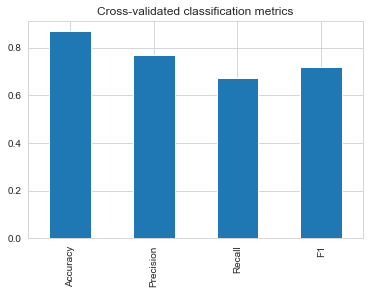

In [111]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);